In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("questions.csv")
df.shape

(404351, 6)

In [20]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
303385,303385,595751,595752,Which Indian colleges admit students on the ba...,Do colleges keep SAT/ACT scores and high schoo...,0
110875,110875,219864,219865,What does destiny mean in Judaism?,What does it mean to follow ones destiny and w...,0
337681,337681,662009,662010,Phasor diagram of transformer on load?,Is a transformer an inductive or capacitive load?,0
177640,177640,350903,350904,How do I create an internet radio in PHP?,How do I create Internet radio in Android?,0
115420,115420,228799,228800,What is the function point estimation techniqu...,What are some rapping techniques I can use?,0
105105,105105,208479,208480,How does world economy work?,How does the world economy work?,1
373404,373404,730595,730596,What are the functions of nuchal lines?,What are the functions of cartilage?,0
338017,338017,662652,662653,What is the importance of starter and choke in...,What is the Use of choke and starter in a tube...,1
379663,379663,742568,742569,Whether for measuring blood pressure electroni...,Benefits of Johnson Controls employee in INDIA?,0
367432,367432,719136,16167,When will NASA go to the stars?,What is likely going to happen to the LucasArt...,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [22]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [23]:
# duplicate rows
df.duplicated().sum()

0

0    255045
1    149306
Name: is_duplicate, dtype: int64
0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<Axes: >

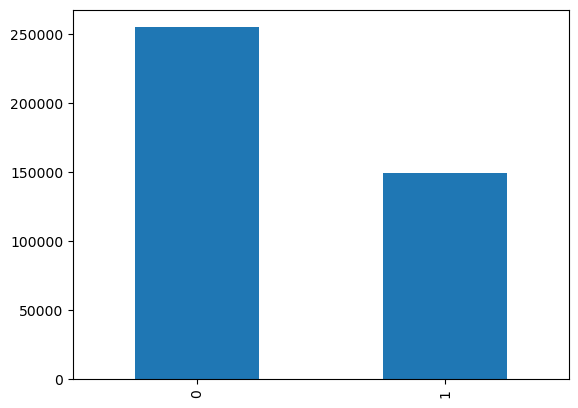

In [24]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [25]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


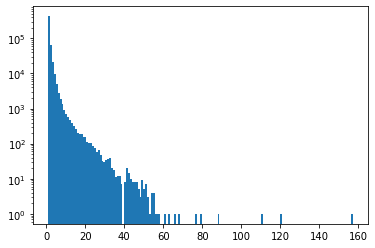

In [20]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()